In [129]:
#Imports
from math import *
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split

sns.set(font_scale=2.0)
sns.set_style("ticks")
sns.set_palette(palette='deep')
sns.set_color_codes(palette='deep')
mpl.rcParams.update({'font.family': 'serif', 'font.serif':'DejaVu Serif'})

%matplotlib notebook

In [2]:
#Outlier at row 15870 confirmed to be incorrect data
House_DataFrame = pd.read_csv('kc_house_data.csv').drop(15870,axis=0)

target = House_DataFrame['price'].values
data = House_DataFrame.drop(['id','price'],axis=1).values

In [3]:
train_data, test_data, train_target, test_target = train_test_split(data, target, train_size=0.5, random_state=123)
print("Labels for training and testing data")
print(train_target)
print(test_target)

Labels for training and testing data
[ 541100.  799990.  439950. ...,  425000.  640000.  500000.]
[ 150000.  279000.  435000. ...,  692500.  370000.  988500.]


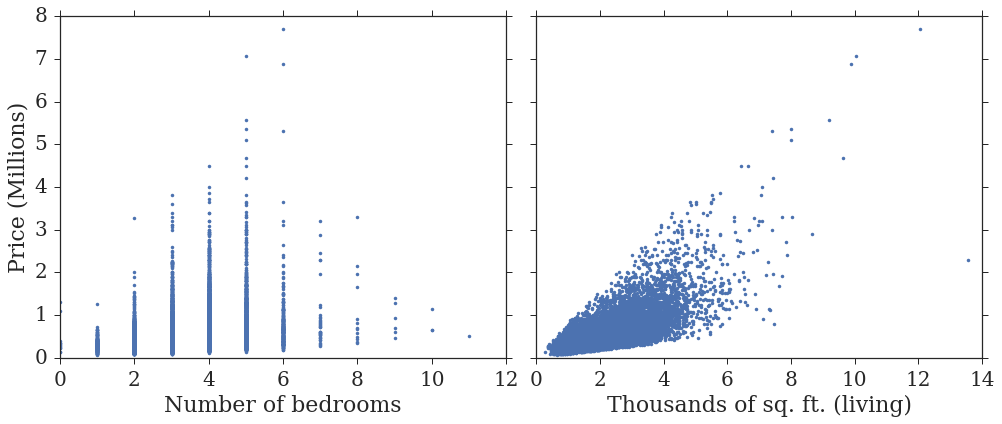

In [10]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(14, 6))
ax[0].plot(data[:,1],target/10**6,marker='.',linestyle='None')
ax[0].set_xlabel('Number of bedrooms')
ax[0].set_ylabel('Price (Millions)')
ax[1].plot(data[:,3]/1000,target/10**6,marker='.',linestyle='None')
ax[1].set_xlabel('Thousands of sq. ft. (living)')
plt.tight_layout()

In [227]:
latitude = House_DataFrame['lat'].values
longitude = House_DataFrame['long'].values
long_lat_price = House_DataFrame[['long','lat','price']].values

long_binsize = (xedges[-1] - xedges[0])/xedges.size #Longitude binsize
lat_binsize = (yedges[-1] - yedges[0])/yedges.size #Latitude binsize
binsize = np.array([lat_binsize,long_binsize]) #Array of binsizes

PopulatedElements = np.where(lat_long_histogram==1) #Find locations that are populated, i.e. have data
PopulatedIndices = np.vstack((PopulatedElements[0],PopulatedElements[1])).T #Array of populated indices
PopulatedBins = PopulatedIndices*binsize + np.array([xedges[0], yedges[0]]) #Array of populated bins (by edges)

In [302]:
for i in range(PopulatedBins[:,0].size):
    print(np.where((long_lat_price[:,1]>PopulatedBins[i,1]) & 
             (long_lat_price[:,1]<(PopulatedBins[i,1]+lat_binsize)))[0].size)

683
651
1072
804
551
973
787
1225
830
539
651
1072
804
551
973
1225
830
539
0
651
1072
804
551
973
787
1225
830
539
450
1072
804
551
0
0
0
0
0
0
0
0
272
310
450
683
1225
830
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
628
272
310
450
683
973
787
1225
830
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
402
628
272
310
450
683
651
1072
804
551
973
787
1225
830
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
402
628
272
310
450
683
651
1072
804
551
973
787
1225
830
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
402
628
272
310
450
683
651
1072
804
551
973
787
1225
830
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
402
628
272
310
450
683
1072
804
551
973
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
402
628
272
310
450
683
651
1072
804
551
973
787
1225
830
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
402
272
310
450
683
651
1072
804
551
973
787
1225
830
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
402
628
310
450
683
651
1072
804
551
973
787
1225
830
539
225
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
421
402
272
310
450
683
651
1072

In [306]:
for i in range(PopulatedBins[:,0].size):
    print(np.where((long_lat_price[:,0]>PopulatedBins[i,0]) 
                   & (long_lat_price[:,0]<(PopulatedBins[i,0]+long_binsize))
            & (long_lat_price[:,1]>PopulatedBins[i,1]) & 
             (long_lat_price[:,1]<(PopulatedBins[i,1]+lat_binsize)))[0].size)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
4
5
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8
5
1
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
4
0
0
0
0
1
72
0
32
26
11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
42
102
155
0
64
62
111
0
0
14
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
16
0
122
206
155
0
71
54
200
17
9
32
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
55
17
156
70
0
114
31
36
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14
0
0
16
72
54
106
53
8
0
131
170
273
93
66
32
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
52
6
64
50
90
65
6
0
0
74
178
239
81
99
21
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
71
40
59
15
80
39
20
28
52
79
117
181
125
116
12
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9
58
49
10
0
58
15
59
75
174
39
169
117
100
16
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
36
67
51
12
30
23
46
12
95
114
151
127
82
109
101
73
25
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
24
27
74
53
3
22
41
28
38
151
67
31
63
108
57
34
32
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
36
21
47


In [277]:
long_lat_price[:,0]

array([-122.257, -122.319, -122.233, ..., -122.299, -122.069, -122.299])

In [270]:
price = 0
count = 0
binindex = 0
for rowindex in range(lat_long_price.shape[0]):
    if long_lat_price[rowindex,0]>PopulatedBins[binindex,0] and long_lat_price[rowindex,0]<\
    PopulatedBins[binindex,0]+long_binsize and long_lat_price[rowindex,1]>PopulatedBins[binindex,1] and \
    long_lat_price[rowindex,1]<PopulatedBins[binindex,1]+lat_binsize:
        price[binindex] += long_lat_price[rowindex,2]
        count += 1
    price /= count

ZeroDivisionError: division by zero

In [267]:
price

array([ nan,  nan])

In [260]:
price = np.zeros(PopulatedBins[:,0].size)

for binindex in range(PopulatedBins[:,0].size):
    count = 0
    for rowindex in range(lat_long_price.shape[0]):
        if long_lat_price[rowindex,0]>PopulatedBins[binindex,0] and long_lat_price[rowindex,0]<\
        PopulatedBins[binindex,0]+long_binsize and long_lat_price[rowindex,1]>PopulatedBins[binindex,1] and \
        long_lat_price[rowindex,1]<PopulatedBins[binindex,1]+lat_binsize:
            price[binindex] += long_lat_price[rowindex,2]
            count += 1
    price[binindex] /= count 

In [263]:
price

array([              nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,   645000.        ,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,   397500.        ,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,               nan,               nan,
                     nan,   670250.        ,   314000.        ,
         526666.66666667,               nan,               nan,
                     nan,               

In [141]:
for i,long in enumerate(longitude):
    for j,lat in enumerate(latitude):
        for rowindex in lat_long_price.shape[0]:
            if lat_long_price[rowindex,0]<

array([-122.257, -122.319, -122.233, ..., -122.299, -122.069, -122.299])

In [312]:
lat_long_price[:,2]

array([ 221900.,  538000.,  180000., ...,  402101.,  400000.,  325000.])

In [ ]:
np.where(lat_long_price[])

In [323]:
H[H==0] = np.nan

In [330]:
lat_long_histogram[np.isnan(lat_long_histogram)==False]

array([  1.20400000e+06,   9.38750000e+05,   1.81750000e+06,
         1.30860000e+06,   8.84000000e+05,   7.55000000e+05,
         6.30000000e+05,   1.45250000e+06,   1.07200000e+06,
         9.95000000e+05,   4.29592000e+05,   1.49000000e+06,
         9.97534000e+05,   3.85900000e+06,   2.56450000e+06,
         3.68000000e+06,   1.53500000e+06,   5.85000000e+05,
         3.95168500e+06,   8.63000000e+05,   4.19900000e+06,
         9.61500000e+05,   4.06090000e+06,   4.63960000e+06,
         1.57000000e+06,   3.31453500e+06,   2.40000000e+06,
         6.54900000e+05,   1.47737500e+06,   5.45000000e+05,
         1.63750000e+06,   2.52700000e+06,   3.45200000e+06,
         3.70929500e+07,   2.62486540e+07,   6.35600000e+06,
         1.13993640e+08,   1.97293500e+07,   3.25941400e+07,
         8.83750000e+06,   4.53915000e+06,   3.33710330e+07,
         1.92591870e+07,   3.52250000e+06,   5.88150000e+06,
         1.08280000e+07,   2.63000000e+06,   3.76222280e+07,
         7.24306470e+07,

In [394]:
#Histogram of latitude and longitude
NumBins = 40
#Histogram, xedges, yedges = np.histogram2d(longitude,latitude,bins=NumBins, weights=lat_long_price[:,2])
Histogram, xedges, yedges = np.histogram2d(longitude,latitude,bins=NumBins)
Histogram[Histogram==0] = np.nan
HistogramMasked = np.ma.masked_invalid(Histogram)

In [372]:
lat_long_price[2899,2]
for idx in np.where((lat_long_price[:,1]>-122.219) & (lat_long_price[:,1]<-122.213)
                     & (lat_long_price[:,0]<47.65) & (lat_long_price[:,0]>47.647)):
    print(np.mean(lat_long_price[idx,2]))

2113000.0


In [352]:
np.where((lat_long_price[:,1]>-122.219) & (lat_long_price[:,1]<-122.213)
         & (lat_long_price[:,0]<47.65) & (lat_long_price[:,0]>47.647))

(array([ 2899,  8539, 12424, 20459]),)

In [415]:
denominator, xedges, yedges = np.histogram2d(longitude,latitude,bins=NumBins)
numerator, _, _ = np.histogram2d(longitude,latitude,bins=[xedges, yedges], weights=lat_long_price[:,2])
Histogram = numerator/denominator
Histogram[Histogram==0] = np.nan
HistogramMasked = np.ma.masked_invalid(Histogram)

In [417]:
np.min(Histogram[np.isnan(Histogram)==False])

75000.0

<IPython.core.display.Javascript object>


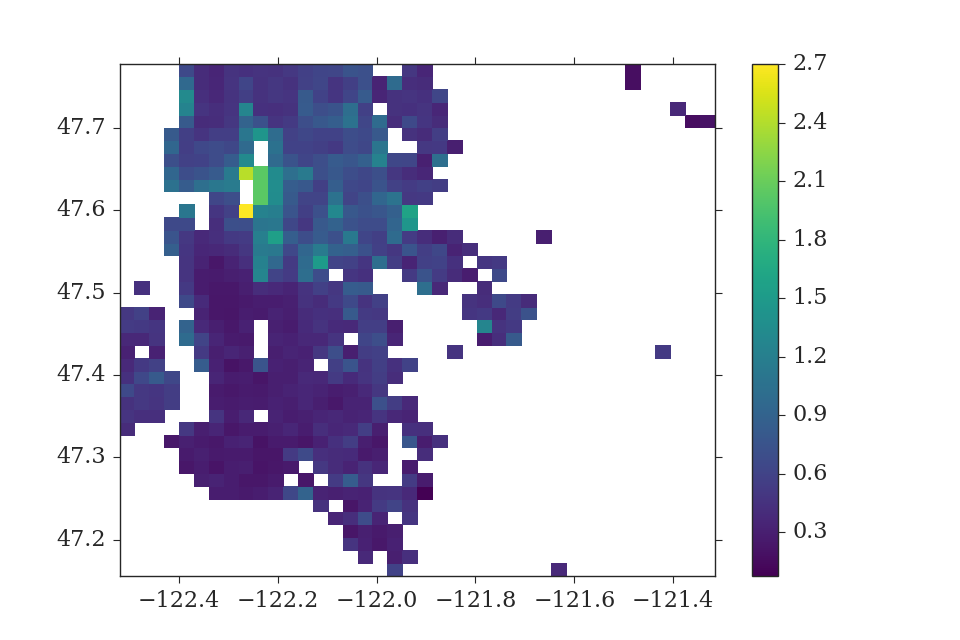

(47.155900000000003, 47.7776)

In [420]:
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
im = ax.pcolormesh(xedges,yedges,HistogramMasked.T*10**-6, cmap='viridis')
fig.colorbar(im, ax=ax)
ax.set_xlim(xedges[0],xedges[-1])
ax.set_ylim(yedges[0],yedges[-1])

<IPython.core.display.Javascript object>


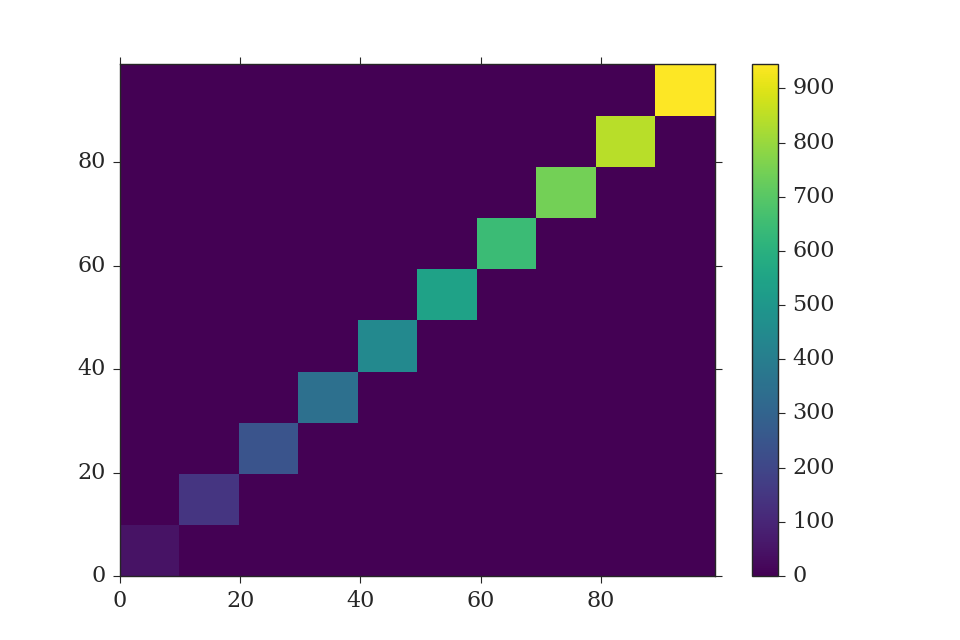

(0.0, 99.0)

In [405]:
xtest = np.linspace(0,99,100)
ytest = np.linspace(0,99,100)
weight_test = np.linspace(0,99,100)
HistogramTest, xedges, yedges = np.histogram2d(xtest,ytest,bins=10,weights=weight_test)

extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
im = ax.pcolormesh(xedges,yedges,HistogramTest, cmap='viridis')
fig.colorbar(im, ax=ax)
ax.set_xlim(xedges[0],xedges[-1])
ax.set_ylim(yedges[0],yedges[-1])

In [399]:
#Histogram of latitude and longitude
# NumBins = 200
HistogramNormalized = np.divide(Histogram,Histogram)
HistogramTest, xedges, yedges = np.histogram2d(HistogramNormalized[0,:],HistogramNormalized[0,:]
                                               ,bins=NumBins, weights=lat_long_price[:,2])

extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
im = ax.pcolormesh(xedges,yedges,HistogramTest, cmap='viridis')
fig.colorbar(im, ax=ax)
ax.set_xlim(xedges[0],xedges[-1])
ax.set_ylim(yedges[0],yedges[-1])

ValueError: cannot convert float NaN to integer

In [ ]:
numpoints = 1000
x = np.linspace(np.min(longitude),np.max(longitude),numpoints)
y = np.linspace(np.min(latitude),np.max(latitude),numpoints)
xx,yy = np.meshgrid(x,y)

xgrid, ygrid = np.mgrid[np.min(longitude):np.max(longitude):1000j, np.min(latitude):np.max(latitude):1000j]
zvalues = sp.interpolate.griddata((latitude,longitude),target,(xgrid, ygrid), method='linear')

In [ ]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:100j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')

In [ ]:
plt.figure()
plt.plot(data[:,1],target/10**6,marker='.',linestyle='None')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (Millions)')
#plt.semilogy()
plt.tight_layout()

In [ ]:
linreg = LinearRegression()
knnreg = KNeighborsRegressor(n_neighbors=1)